# Introduction

### Imports

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt
# Import networkx
import networkx as nx
# Import math for mathematical calculations
import math
# Numerical and random functions.
import numpy as np

## What is Heap Sort?

Heap sort is a sorting algorithm based on the binary heap data structure. Sorting is a process of arranging entities in a particular order, i.e. ascending, descending, or alphabetical order. 

Data structure sorting is concerned with the arrangement of data. There are different sorting algorithms that depend on various factors like data structure, complexity, etc. One of the popular sorting algorithms that we are going to discuss here is the Heap Sort.

In order to fully understand how heap sort works, we first have to understand a **binary heap** and subsequently, a **binary tree**.



### Binary tree

A binary tree is a tree-type non-linear data structure with a maximum of two children for each parent. Every node in a binary tree has a left and right reference along with the data element. The node at the top of the hierarchy of a tree is called the root node. The nodes that hold other sub-nodes are the parent nodes.


[![Binary-Tree1.png](https://i.postimg.cc/B6YMrPz4/Binary-Tree1.png)](https://postimg.cc/tZ63PJyM)

The following are the important terms with respect to Binary trees:

- **Path** - Path refers to the sequence of nodes along the edges of a tree.
- **Root** - The node at the top of the tree is called root. There is only one root per tree and one path from the root node to any node.
- **Parent Node** − Any node except the root node has one edge upward to a node called parent.
- **Child Node** − The node below a given node connected by its edge downward is called its child node.
- **Leaf Node** − The node which does not have any child node is called the leaf node.
- **Sub-tree** − Subtree represents the descendants of a node.


### Binary heap
A binary heap is simply a complete binary tree, in which each level of the tree (except, perhaps, the last level) is completely filled and all nodes are stored starting from the left to right. 

A binary heap also takes into account how the values are stored. Either the value of the parent node is always greater than the value of its children (called a max heap), or vice versa, where the value of the parent is smaller than that of its children (called a min heap). 


<b>Reference- https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm<b>
<br>
<hr>

## Visual illustration
We can use the following libraries to illustrate a set of nodes in the form of a Binary Tree

1. **matplotlib.pyplot** - The pyplot functions allow us to make some change to a figure. For example to creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, etc.
2. **networkx** - A package for providing further aid in the creation and manipulation of complex networks

The below code show an implementation of visualing plotting a list of numbers into a binary tree structure

[1, 4, 68, 37, 10, 6, 39, 12, 5]


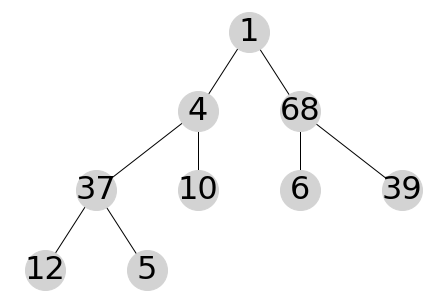

In [2]:
def drawtree(L, highlight=None):
    
  # Create a balanced binary tree
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
    
  # Remove nodes beyond the length of L
  T.remove_nodes_from(list(T.nodes)[len(L):])
    
  # Rename nodes within L
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
    
  # Get positions for the nodes
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draw the graph
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
    
  # Highlight nodes where needed
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

L = [1,4,68,37,10,6,39,12,5]

# Print the list
print(L)

# Draw the tree from list L
drawtree(L)

<b>Credit - Dr. Ian McLoughlin<b>
<br>
<hr>


# Implementation of Heap Sort
The heap sort algorithm has two main steps. Both are described in  further detail below:

1. **Build a max heap from the available data points.**
2. **Switch the root node with the last node, and remove it from the heap.** 

(Repeat these two steps until there is only one element is remaining). 


## Step 1: Build a max heap from the data.
In this example, we will be using a max heap instead of min heap. In order to create a max heap, we must compare the value of this parent node with its children. If the value of the child is greater than the parent, then swap them. This process is repeated until all parent nodes have a greater value than their children.

In order to check if a parent needs to be swapped with either of its children, we need the know the value of the parent and that of either its children. We know the location of the root as it is in index 0. To determine the values of its children, in a binary heap structure we can use the calculation (2 * root-index +1) for the left child and (2 * root-index +2) for the right child.

The video below offers a visual guide for this first step of Heap Sort. The video uses different values within the nodes when compared to examples further below on this notebook, however the underlying process is the exact same. 

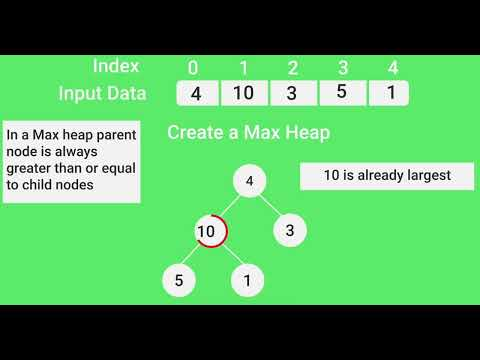

In [1]:
from IPython.display import YouTubeVideo
id='yehkKyDFIw0'
YouTubeVideo(id=id,width=800,height=500)

Reference - I created an edited version from the following original video https://www.youtube.com/watch?v=MtQL_ll5KhQ&t=10s

## Code snippet for building a Max Heap
Please note - The following code is not a complete implementation of Heap Sort. It is only an implementation of the first part of heapsort(building the Max Heap). Later on, when we look at the second half of heapsort, we will add more code to this snippet for a full implementation of Heap Sort.

In [2]:
# heapify is the process of creating a heap data structure from a binary tree through
# recursive operations of sorting existing elements.
def heapify(arr, n, root):
         
        # Find largest element among root and children
        largest = root
        
        # Find the left and right children of the root.
        leftChild = 2 * root + 1
        rightChild = 2 * root + 2
        
        # check if the left child of the root exists and if it is greater than root 
        if leftChild < n and arr[root] < arr[leftChild]:
            largest = leftChild

        # check if the right child of the root exists and is it is greater than root 
        if rightChild < n and arr[largest] < arr[rightChild]:
            largest = rightChild

        # If the root is not the largest, swap it with largest
        if (largest != root):
            arr[root], arr[largest] = arr[largest], arr[root]            
            # Heapify the root. 
            heapify(arr, n, largest)
  

In [9]:
# In this implementation, heapSort() calls heapify() within a single for loop. The end 
# result will be a max heap. However, the resulting elements will not be sorted just yet. 

def heapSort(arr): 
    # First, we need to get the size(length) of the list being passed down
    n = len(arr) 
  
    # Itterate through the elements and heapify them. The resulting list of elements will be sorted
    # in a max heap fashion.
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 

### Driver Code:

In [4]:
arr = [1,4,68,37,10,6,39,12,5]
n = len(arr)

# Iterating through the list and printing out each elements value
print("Binary Tree:")
for i in range(n):
    print("%d " % arr[i], end='')

# Creating Max Heap from existing list of elements
heapSort(arr)

# Iterating through the list and printing out each elements value
print("\n\nMax Heap:")
for i in range(n):
    print("%d " % arr[i], end='')

Binary Tree:
1 4 68 37 10 6 39 12 5 

Max Heap:
68 37 39 12 10 6 1 4 5 

At this point, the binary heap has been converted into a max heap. For an easier visualisation, please refer to the diagrams below showing the before and after of this binary tree for this data set:

[![t4.png](https://i.postimg.cc/QC2Rddpv/t4.png)](https://postimg.cc/n91ddZS1)

[![t2.png](https://i.postimg.cc/nzHDDVh9/t2.png)](https://postimg.cc/FfBzt4ch)

Reference - These images are original. Created using https://www.lucidchart.com/
<br>
<br>

## Step 2: Switch the root node with the last node, and remove it from the max heap
Since the tree satisfies Max Heap property, then the largest item is stored at the root node.The following are the next steps:

* Remove the root element and put at the end of the array (nth position) 
* Put the last node of the Max Heap at the vacant position(the root).
* Perform Max Heap on the root element again so that we have the highest element at the root.

It is important to understand that once we put the last node of the Max Heap at the vacant position(the root), it will almost certainly break the Max Heap property of this heap. Therefore, that is why the Max-Heap process must be performed again in order to ensure that throughout the entire heap the parent node of any children nodes is always has a higher value.  

The video below offers a visual guide for this second step of Heap Sort.  The video uses different values within the nodes when compared to examples above on this notebook, however the underlying process is the exact same. 

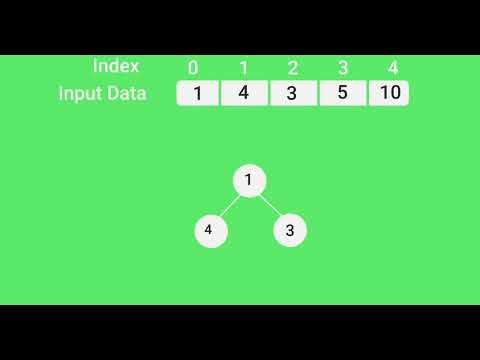

In [5]:
id='qoiajKBX8i4'
YouTubeVideo(id=id,width=800,height=500)

Reference - I created an edited version from the following original video https://www.youtube.com/watch?v=MtQL_ll5KhQ&t=10s

## Code snippet for swapping nodes and removing them from the heap

Please note - Here, we are completing the code required for a full implementation of Heap Sort. We only need to re-define the heapsort() method in order to include the further required code (the second for loop) which will handle sorting the Max Heap.

In [6]:
# calls heapify() within two for loops. 
# The first for-loop sorts the list of elements into a max heap, the second sorts  
# the elements in an ascending order.

def heapSort(arr): 
    # First, we need to get the size(length) of the list being passed down
    n = len(arr) 
  
    # Itterate through the elements and heapify them. The resulting list of elements will be sorted
    # in a max heap fashion.
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap

        #Heapify root element
        heapify(arr, i, 0)   

In [7]:
heapSort(arr)

n = len(arr)
print("\nSorted list is")
for i in range(n):
  print("%d " % arr[i], end='')


Sorted list is
1 4 5 6 10 12 37 39 68 

As can be seen from the output above, the list is sorted. Hence, Heap Sort has been achieved.

## Full code implementation for Heapsort

In [8]:
def heapify(arr, n, root):
         
    # Find largest element among root and children
    largest = root

    # Find the left and right children of the root.
    leftChild = 2 * root + 1
    rightChild = 2 * root + 2

    # check if the left child of the root exists and if it is greater than root 
    if leftChild < n and arr[root] < arr[leftChild]:
        largest = leftChild

    # check if the right child of the root exists and is it is greater than root 
    if rightChild < n and arr[largest] < arr[rightChild]:
        largest = rightChild

    # If the root is not the largest, swap it with largest and keep heapifying
    if (largest != root):
        arr[root], arr[largest] = arr[largest], arr[root]

        # Heapify the root. 
        heapify(arr, n, largest)

def heapSort(arr): 
    # First, we need to get the size(length) of the list being passed down
    n = len(arr) 
  
    # Itterate through the elements and heapify them. The resulting list of elements will be sorted
    # in a max heap fashion.
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap

        #Heapify root element
        heapify(arr, i, 0) 
  


#Driver Code
arr = [1,4,68,37,10,6,39,12,5]
n = len(arr)

heapSort(arr)
for i in range(n):
    print("%d " % arr[i], end='')




1 4 5 6 10 12 37 39 68 

# Computational complexity of Heap Sort.


## Time complexity of Heap Sort.


To explain the computational complexity of an algorithem we must us Big O notation. At its most basic level, Big O notation defines how long it takes an algorithm to run, also called time complexity. It represents how long the runtime for a given algorithm can be as the data grows larger. 


You may be wondering what exactly is the importance of knowing the time complexity of any sorting algorithem, but as process, software and programs grow in size, these tiny differences in computational speed add up. All of a sudden, an algorithm that used to take little time to complete starts to slow down, so developers and programmers need to know what the worst-case scenario is, or rather, the slowest an algorithm could potentially run given an increasing amount of input data. 

The following chart is a good reference for the different levels of complexity in Big O:

[![big-o.jpg](https://i.postimg.cc/4NSFc3Kf/big-o.jpg)](https://postimg.cc/vc5zFbLk)

# Placeholder Title
Placeholder Text

# Placeholder Title
Placeholder Text

# References
We report here relevant references:
1. 
2. 